In [1]:
import wbdata
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.ensemble import ExtraTreesClassifier
import statistics
from geopy.geocoders import Nominatim
import math
import folium
from folium.plugins import HeatMap

In [2]:
url = 'https://www.worldometers.info/coronavirus/'
requests.get(url)
wdweb = requests.get(url)

In [3]:
wdweb

<Response [200]>

In [4]:
wdwebsoup = BeautifulSoup(wdweb.text, 'lxml')

In [5]:
wdwebtable_data = wdwebsoup.find('table', id = 'main_table_countries_yesterday')

In [6]:
headers = []
for i in wdwebtable_data.find_all('th'):
    title = i.text
    headers.append(title)

In [7]:
covid = pd.DataFrame(columns = headers)

In [8]:
for j in wdwebtable_data.find_all('tr')[1:]:
        row_data = j.find_all('td')
        row = [td.text for td in row_data]
        length = len(covid)
        covid.loc[length] = row

In [9]:
covid.columns = ['ID','country','TotalCases','NewCases','TotalDeaths','NewDeaths','TotalRecov','NewRecov','ActiveCases','SeriousCritical','TotalCases1M','TotalDeaths1M','TotalTests','TotalTests1M','Population','Continent','1CaseEvery','1DeathEvery','1TestEvery']
covid.set_index('country', inplace=True, drop=True)

In [10]:
covid.shape

(234, 18)

In [11]:
covid.index


Index(['\nAsia\n', '\nNorth America\n', '\nSouth America\n', '\nEurope\n',
       '\nAfrica\n', '\nOceania\n', '\n\n', 'World', 'China', 'USA',
       ...
       'Marshall Islands', 'Wallis and Futuna', 'Total:', 'Total:', 'Total:',
       'Total:', 'Total:', 'Total:', 'Total:', 'Total:'],
      dtype='object', name='country', length=234)

In [12]:
pd.set_option('display.max_rows', None)
covid.index=covid.index.str.replace("\n","")
covid=covid.rename(index={'USA': 'United States'})

In [13]:
data_date = datetime.datetime(2018, 12, 31), datetime.datetime(2018, 12, 31)
# countries = [i['id'] for i in wbdata.get_country(incomelevel='HIC')]
indicators = {"EG.ELC.ACCS.ZS":"AccessElectricity", "NY.GDP.MKTP.CD":"GDP", 
             "NY.GDP.PCAP.CD":"GDPperCap", "SH.XPD.CHEX.PC.CD":"HealthExpenseperCap", 
              "IT.NET.USER.ZS":"IndividUsingInternet", "SP.DYN.LE00.IN":"LifeExpect", 
              "SH.MED.PHYS.ZS":"DrsPer1k", "GB.XPD.RSDV.GD.ZS":"RDExpen", 
              "SH.HIV.INCD":"NewInfecHIV", "SP.DYN.TFRT.IN":"FertilityRate",
             "per_si_allsi.cov_pop_tot":"CovSocialInsurance", 
             "SP.URB.TOTL":"UrbanPopulation", "SP.URB.TOTL.IN.ZS":"UrbanPopulationPerc"}
wbdf = wbdata.get_dataframe(indicators, country="all", data_date=data_date)

In [14]:
covidandwb_merged = pd.merge(covid,wbdf, on=["country"])

In [15]:
covidandwb_merged

ID  TotalCases  NewCases TotalDeaths NewDeaths  \
country                                                                   
North America                11,132,276  +115,272     350,965    +1,548   
World                        45,892,272  +573,614   1,193,240    +7,513   
China                     1      85,940       +25      4,634              
United States             2   9,316,297  +101,461    235,159       +988   
India                     3   8,136,166   +48,120    121,681       +550   
Brazil                    4   5,519,528   +23,126    159,562       +529   
France                    6   1,331,984   +49,215     36,565       +545   
Spain                     7   1,264,517   +25,595     35,878       +239   
Argentina                 8   1,157,179   +13,379     30,792       +350   
Colombia                  9   1,063,151   +10,029     31,135       +209   
Mexico                   11     912,811    +5,948     90,773       +464   
Peru                     12     900,180    +2,586     34,411        +49   
South Africa             13     723,682    +1,912     19,230        +66   
Italy                    14     647,672   +31,082     38,321       +199   
Germany                  16     517,720   +19,367     10,523        +88   
Chile                    17     508,571    +1,521     14,158        +40   
Iraq                     18     470,633    +2,878     10,862        +47   
Indonesia                19     406,945    +2,897     13,782        +81   
Bangladesh               20     406,364    +1,604      5,905        +19   
Belgium                  21     392,258   +23,921     11,308       +138   
Philippines              22     378,926    +1,999      7,185        +38   
Ukraine                  23     378,729    +8,312      7,041       +173   
Turkey                   24     373,154    +2,322     10,177        +78   
Saudi Arabia             25     346,880      +398      5,383        +20   
Netherlands              26     341,374   +11,119      7,345        +87   
Poland                   27     340,834   +21,629      5,351       +202   
Pakistan                 28     332,186    +1,078      6,795        +20   
Israel                   30     313,701      +587      2,514         +6   
Romania                  31     235,586    +6,546      6,867       +103   
Canada                   32     231,999    +3,457     10,110        +36   
Morocco                  33     215,294    +3,256      3,625        +53   
Nepal                    34     168,235    +3,517        920        +16   
Ecuador                  35     167,147      +845     12,632        +10   
Switzerland              36     154,251    +9,207      2,280        +80   
Bolivia                  37     141,484      +163      8,705        +11   
Portugal                 38     137,272    +4,656      2,468        +40   
Panama                   39     132,867      +822      2,688        +10   
Qatar                    40     132,343      +193        232         +1   
Dominican Republic       42     126,332      +419      2,236         +2   
Kuwait                   43     125,337      +671        773         +6   
Sweden                   44     124,355                5,938         +9   
Oman                     45     114,434                1,208              
Kazakhstan               46     111,492      +392      1,825              
Costa Rica               47     108,866    +1,296      1,371        +14   
Guatemala                49     107,339      +549      3,714        +10   
Japan                    50      99,622      +770      1,744        +11   
Austria                  51      99,576    +5,627      1,082        +26   
Belarus                  52      97,499      +970        977         +4   
Honduras                 53      96,150      +951      2,661         +9   
Ethiopia                 54      95,789      +488      1,464         +7   
Armenia                  56      87,432    +2,398      1,300        +28   
Bahrain                  57      81,466      +204 

In [16]:
covidandwb_merged.shape

(172, 31)

In [17]:
covidandwb = covidandwb_merged

In [18]:
covidandwb = covidandwb.drop(["NewCases", "NewDeaths", "TotalRecov", "NewRecov", 
                              "ActiveCases", "SeriousCritical"], axis=1)
covidandwb = covidandwb.drop(["World"], axis=0)
covidandwb = covidandwb.drop(["North America"], axis=0)

In [19]:
covidandwb

ID TotalCases TotalDeaths TotalCases1M TotalDeaths1M  \
country                                                                         
China                     1     85,940      4,634            60             3   
United States             2  9,316,297    235,159        28,091           709   
India                     3  8,136,166    121,681         5,877            88   
Brazil                    4  5,519,528    159,562        25,906           749   
France                    6  1,331,984     36,565        20,391           560   
Spain                     7  1,264,517     35,878        27,042           767   
Argentina                 8  1,157,179     30,792        25,526           679   
Colombia                  9  1,063,151     31,135        20,821           610   
Mexico                   11    912,811     90,773         7,055           702   
Peru                     12    900,180     34,411        27,177         1,039   
South Africa             13    723,682     19,230        12,151           323   
Italy                    14    647,674     38,321        10,717           634   
Germany                  16    517,720     10,523         6,173           125   
Chile                    17    508,571     14,158        26,529           739   
Iraq                     18    470,633     10,862        11,616           268   
Indonesia                19    406,945     13,782         1,483            50   
Bangladesh               20    406,364      5,905         2,459            36   
Belgium                  21    392,258     11,308        33,797           974   
Philippines              22    378,926      7,185         3,443            65   
Ukraine                  23    378,729      7,041         8,677           161   
Turkey                   24    373,154     10,177         4,409           120   
Saudi Arabia             25    346,880      5,383         9,913           154   
Netherlands              26    341,374     7,345         19,908           428   
Poland                   27    340,834      5,351         9,009           141   
Pakistan                 28    332,186      6,795         1,494            31   
Israel                   30    313,701      2,514        34,107           273   
Romania                  31    235,586      6,867        12,274           358   
Canada                   32    231,999     10,110         6,129           267   
Morocco                  33    215,294      3,625         5,810            98   
Nepal                    34    168,235        920         5,740            31   
Ecuador                  35    167,147     12,632         9,427           712   
Switzerland              36    154,251      2,280        17,780           263   
Bolivia                  37    141,484      8,705        12,066           742   
Portugal                 38    137,272      2,468        13,476           242   
Panama                   39    132,867      2,688        30,635           620   
Qatar                    40    132,343        232        47,134            83   
Dominican Republic       42    126,332      2,236        11,607           205   
Kuwait                   43    125,337        773        29,207           180   
Sweden                   44    124,355      5,938        12,288           587   
Oman                     45    114,434      1,208        22,226           235   
Kazakhstan               46    111,492      1,825         5,914            97   
Costa Rica               47    108,866      1,371        21,306           268   
Guatemala                49    107,339      3,714         5,955           206   
Japan                    50     99,622      1,744           788            14   
Austria                  51     99,576      1,082        11,035           120   
Belarus                  52     97,499        977        10,319           103   
Honduras                 53     96,150      2,661         9,657           267   
Ethiopia                 54     95,789      1,464       

In [19]:
TotalDeathsindex = covidandwb[covidandwb['TotalDeaths'].str.match(' ')].index
covidandwb.loc[TotalDeathsindex, 'TotalDeaths'] = 0
covidandwb['TotalDeaths']=covidandwb['TotalDeaths'].str.replace(",","").astype(float)
covidandwb.loc[TotalDeathsindex, 'TotalDeaths1M'] = 0
covidandwb['TotalDeaths1M']=covidandwb['TotalDeaths1M'].str.replace(",","").astype(float)
covidandwb['TotalCases1M']=covidandwb['TotalCases1M'].str.replace(",","").astype(float)
covidandwb['TotalCases']=covidandwb['TotalCases'].str.replace(",","").astype(float)

In [21]:
covidandwb.head()

ID  TotalCases  TotalDeaths  TotalCases1M  TotalDeaths1M  \
country                                                                  
China          1     85940.0       4634.0          60.0            3.0   
United States  2   9316297.0     235159.0       28091.0          709.0   
India          3   8136166.0     121681.0        5877.0           88.0   
Brazil         4   5519528.0     159562.0       25906.0          749.0   
France         6   1331984.0      36565.0       20391.0          560.0   

                TotalTests TotalTests1M      Population      Continent  \
country                                                                  
China          160,000,000      111,163  1,439,323,776            Asia   
United States  142,950,353      431,030    331,648,064   North America   
India          107,728,088       77,810  1,384,493,422            Asia   
Brazil          21,900,000      102,787    213,061,062   South America   
France          15,836,818      242,443     65,321,753          Europe   

              1CaseEvery  ... HealthExpenseperCap IndividUsingInternet  \
country                   ...                                            
China             16,748  ...                None                  NaN   
United States         36  ...                None            88.498903   
India                170  ...                None            20.081300   
Brazil                39  ...                None            70.434283   
France                49  ...                None            82.043187   

               LifeExpect  DrsPer1k  RDExpen NewInfecHIV  FertilityRate  \
country                                                                   
China           76.704000       NaN  2.18568         NaN         1.6900   
United States   78.539024       NaN  2.83766     33000.0         1.7295   
India           69.416000    0.8571  0.64998         NaN         2.2220   
Brazil          75.672000    2.1643      NaN         NaN         1.7300   
France          82.724390    3.2672  2.20002         NaN         1.8800   

               CovSocialInsurance  UrbanPopulation  UrbanPopulationPerc  
country                                                                  
China                         NaN      823827650.0               59.152  
United States                 NaN      268720071.0               82.256  
India                         NaN      460295677.0               34.030  
Brazil                  30.869548      181335507.0               86.569  
France                        NaN       53870058.0               80.444  

[5 rows x 25 columns]

In [22]:
covidandwb.dtypes

ID                       object
TotalCases              float64
TotalDeaths             float64
TotalCases1M            float64
TotalDeaths1M           float64
TotalTests               object
TotalTests1M             object
Population               object
Continent                object
1CaseEvery               object
1DeathEvery              object
1TestEvery               object
AccessElectricity       float64
GDP                     float64
GDPperCap               float64
HealthExpenseperCap      object
IndividUsingInternet    float64
LifeExpect              float64
DrsPer1k                float64
RDExpen                 float64
NewInfecHIV             float64
FertilityRate           float64
CovSocialInsurance      float64
UrbanPopulation         float64
UrbanPopulationPerc     float64
dtype: object

In [20]:
covidandwb['1DeathEvery']= covidandwb['1DeathEvery'].str.replace(",","")
covidandwb['1DeathEvery']=covidandwb['1DeathEvery'].str.replace(r'^\s*$','NaN')
covidandwb['1DeathEvery']=covidandwb['1DeathEvery'].astype(float)

In [21]:
covidandwb['TotalTests']= covidandwb['TotalTests'].str.replace(",","")
covidandwb['TotalTests']=covidandwb['TotalTests'].str.replace(r'^\s*$','NaN')
covidandwb['TotalTests']=covidandwb['TotalTests'].astype(float)

In [22]:
covidandwb['TotalTests1M']= covidandwb['TotalTests1M'].str.replace(",","")
covidandwb['TotalTests1M']=covidandwb['TotalTests1M'].str.replace(r'^\s*$','NaN')
covidandwb['TotalTests1M']=covidandwb['TotalTests1M'].astype(float)

In [23]:
covidandwb['Population']= covidandwb['Population'].str.replace(",","")
covidandwb['Population']=covidandwb['Population'].str.replace(r'^\s*$','NaN')
covidandwb['Population']=covidandwb['Population'].astype(float)

In [27]:
covidandwb['1CaseEvery']= covidandwb['1CaseEvery'].str.replace(",","")
covidandwb['1CaseEvery']=covidandwb['1CaseEvery'].str.replace(r'^\s*$','NaN')
covidandwb['1CaseEvery']=covidandwb['1CaseEvery'].astype(float)

In [24]:
covidandwb['HealthExpenseperCap']= covidandwb['HealthExpenseperCap'].str.replace(",","")
covidandwb['HealthExpenseperCap']=covidandwb['HealthExpenseperCap'].str.replace(r'^\s*$','NaN')
covidandwb['HealthExpenseperCap']=covidandwb['HealthExpenseperCap'].astype(float)

In [25]:
covidandwb['1TestEvery']= covidandwb['1TestEvery'].str.replace(",","")
covidandwb['1TestEvery']=covidandwb['1TestEvery'].str.replace(r'^\s*$','NaN')
covidandwb['1TestEvery']=covidandwb['1TestEvery'].astype(float)

In [30]:
covidandwb.dtypes

ID                       object
TotalCases              float64
TotalDeaths             float64
TotalCases1M            float64
TotalDeaths1M           float64
TotalTests              float64
TotalTests1M            float64
Population              float64
Continent                object
1CaseEvery              float64
1DeathEvery             float64
1TestEvery              float64
AccessElectricity       float64
GDP                     float64
GDPperCap               float64
HealthExpenseperCap     float64
IndividUsingInternet    float64
LifeExpect              float64
DrsPer1k                float64
RDExpen                 float64
NewInfecHIV             float64
FertilityRate           float64
CovSocialInsurance      float64
UrbanPopulation         float64
UrbanPopulationPerc     float64
dtype: object

## Imputation Data

In [31]:
covidandwb.shape

(170, 25)

In [32]:
covidandwb.isnull().sum()

ID                        0
TotalCases                0
TotalDeaths              13
TotalCases1M              0
TotalDeaths1M            13
TotalTests               13
TotalTests1M             13
Population                0
Continent                 0
1CaseEvery                0
1DeathEvery              13
1TestEvery               13
AccessElectricity         1
GDP                      12
GDPperCap                12
HealthExpenseperCap     170
IndividUsingInternet     97
LifeExpect               10
DrsPer1k                114
RDExpen                 110
NewInfecHIV              66
FertilityRate             9
CovSocialInsurance      164
UrbanPopulation           1
UrbanPopulationPerc       1
dtype: int64

In [33]:
covidandwb.columns

Index(['ID', 'TotalCases', 'TotalDeaths', 'TotalCases1M', 'TotalDeaths1M',
       'TotalTests', 'TotalTests1M', 'Population', 'Continent', '1CaseEvery',
       '1DeathEvery', '1TestEvery', 'AccessElectricity', 'GDP', 'GDPperCap',
       'HealthExpenseperCap', 'IndividUsingInternet', 'LifeExpect', 'DrsPer1k',
       'RDExpen', 'NewInfecHIV', 'FertilityRate', 'CovSocialInsurance',
       'UrbanPopulation', 'UrbanPopulationPerc'],
      dtype='object')

Eliminamos:
* **CovSocialInsurance**
* **RDExpen**
* **HealthExpenseperCap**
* **IndividUsingInternet**

Debido a que todas ellas cuentan con más de un 60% de datos nulos

In [26]:
columns_acceptables = ['ID', 'TotalCases', 'TotalDeaths', 'TotalCases1M', 'TotalDeaths1M',
       'TotalTests', 'TotalTests1M', 'Population', 'Continent', '1CaseEvery',
       '1DeathEvery', '1TestEvery', 'AccessElectricity', 'GDP', 'GDPperCap', 'LifeExpect','DrsPer1k', 'NewInfecHIV', 'FertilityRate',
       'UrbanPopulation', 'UrbanPopulationPerc']

In [27]:
covidandwb = covidandwb[columns_acceptables]
covidandwb.isnull().sum()

ID                       0
TotalCases               0
TotalDeaths             13
TotalCases1M             0
TotalDeaths1M           13
TotalTests              13
TotalTests1M            13
Population               0
Continent                0
1CaseEvery               0
1DeathEvery             13
1TestEvery              13
AccessElectricity        1
GDP                     12
GDPperCap               12
LifeExpect              10
DrsPer1k               114
NewInfecHIV             66
FertilityRate            9
UrbanPopulation          1
UrbanPopulationPerc      1
dtype: int64

In [28]:
def imputationFunct(x, indexColumn):
    if math.isnan(x.iloc[indexColumn]):
        x.iloc[indexColumn] = statistics.median(covidandwb.loc[covidandwb['Continent'] == x.iloc[8]].iloc[:, indexColumn].dropna())
    return x.iloc[indexColumn]

In [29]:
columnsWithNaN = [2,4,5,6,10,11,12,13,14,15,16,17,18,19,20]

In [30]:
for column in columnsWithNaN:
    covidandwb.iloc[:,[column]] = covidandwb.apply(imputationFunct,axis=1,args=(column,))

In [39]:
covidandwb.isnull().sum()

ID                     0
TotalCases             0
TotalDeaths            0
TotalCases1M           0
TotalDeaths1M          0
TotalTests             0
TotalTests1M           0
Population             0
Continent              0
1CaseEvery             0
1DeathEvery            0
1TestEvery             0
AccessElectricity      0
GDP                    0
GDPperCap              0
LifeExpect             0
DrsPer1k               0
NewInfecHIV            0
FertilityRate          0
UrbanPopulation        0
UrbanPopulationPerc    0
dtype: int64

In [31]:
covidandwb.head()

ID  TotalCases  TotalDeaths  TotalCases1M  TotalDeaths1M  \
country                                                                  
China          1     85940.0       4634.0          60.0            3.0   
United States  2   9316297.0     235159.0       28091.0          709.0   
India          3   8136166.0     121681.0        5877.0           88.0   
Brazil         4   5519528.0     159562.0       25906.0          749.0   
France         6   1331984.0      36565.0       20391.0          560.0   

                TotalTests  TotalTests1M    Population      Continent  \
country                                                                 
China          160000000.0      111163.0  1.439324e+09           Asia   
United States  142950353.0      431030.0  3.316481e+08  North America   
India          107728088.0       77810.0  1.384493e+09           Asia   
Brazil          21900000.0      102787.0  2.130611e+08  South America   
France          15836818.0      242443.0  6.532175e+07         Europe   

              1CaseEvery  ...  1TestEvery  AccessElectricity           GDP  \
country                   ...                                                
China             16,748  ...         9.0         100.000000  1.389482e+13   
United States         36  ...         2.0         100.000000  2.052905e+13   
India                170  ...        13.0          95.235855  2.713165e+12   
Brazil                39  ...        10.0         100.000000  1.885483e+12   
France                49  ...         4.0         100.000000  2.787864e+12   

                  GDPperCap  LifeExpect  DrsPer1k  NewInfecHIV  FertilityRate  \
country                                                                         
China           9976.676822   76.704000    0.9186       1050.0         1.6900   
United States  62840.020239   78.539024    1.9357      33000.0         1.7295   
India           2005.863005   69.416000    0.8571       1050.0         2.2220   
Brazil          9001.234249   75.672000    2.1643       2300.0         1.7300   
France         41631.090739   82.724390    3.2672        500.0         1.8800   

               UrbanPopulation  UrbanPopulationPerc  
country                                              
China              823827650.0               59.152  
United States      268720071.0               82.256  
India              460295677.0               34.030  
Brazil             181335507.0               86.569  
France              53870058.0               80.444  

[5 rows x 21 columns]

In [42]:
geolocator = Nominatim(user_agent='myapplication')

In [43]:
def getLatitude(x):
    return geolocator.geocode(x[0]).latitude

In [44]:
def getLongitude(x):
    return geolocator.geocode(x[0]).longitude

In [45]:
x=covidandwb.reset_index().apply(getLatitude,axis=1)

In [46]:
covidandwb.head()

ID  TotalCases  TotalDeaths  TotalCases1M  TotalDeaths1M  \
country                                                                  
China          1     85790.0       4634.0          60.0            3.0   
United States  2   8889179.0     230510.0       26805.0          695.0   
India          3   7909050.0     119030.0        5713.0           86.0   
Brazil         4   5394128.0     157163.0       25320.0          738.0   
France         6   1138507.0      34761.0       17430.0          532.0   

                TotalTests  TotalTests1M    Population      Continent  \
country                                                                 
China          160000000.0      111163.0  1.439324e+09           Asia   
United States  133229328.0      401751.0  3.316216e+08  North America   
India          102523469.0       74061.0  1.384308e+09           Asia   
Brazil          21900000.0      102797.0  2.130405e+08  South America   
France          14880040.0      227803.0  6.531978e+07         Europe   

               1CaseEvery  ...  1TestEvery  AccessElectricity           GDP  \
country                    ...                                                
China             16777.0  ...         9.0         100.000000  1.389482e+13   
United States        37.0  ...         2.0         100.000000  2.052905e+13   
India               175.0  ...        14.0          95.235855  2.713165e+12   
Brazil               39.0  ...        10.0         100.000000  1.885483e+12   
France               57.0  ...         4.0         100.000000  2.787864e+12   

                  GDPperCap  LifeExpect  DrsPer1k  NewInfecHIV  FertilityRate  \
country                                                                         
China           9976.676822   76.704000    0.9186       1050.0         1.6900   
United States  62840.020239   78.539024    1.9357      33000.0         1.7295   
India           2005.863005   69.416000    0.8571       1050.0         2.2220   
Brazil          9001.234249   75.672000    2.1643       2300.0         1.7300   
France         41631.090739   82.724390    3.2672        500.0         1.8800   

               UrbanPopulation  UrbanPopulationPerc  
country                                              
China              823827650.0               59.152  
United States      268720071.0               82.256  
India              460295677.0               34.030  
Brazil             181335507.0               86.569  
France              53870058.0               80.444  

[5 rows x 21 columns]

In [47]:
covidandwb.iloc[:,[(len(covidandwb.columns) - 1)]] = covidandwb.apply(imputationFunct,axis=1,args=(2,))

/home/dsninja/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [62]:
covidandwb.head()

ID  TotalCases  TotalDeaths  TotalCases1M  TotalDeaths1M  \
country                                                                  
China          1     85729.0       4634.0          60.0            3.0   
United States  2   8664216.0     228381.0       26128.0          689.0   
India          3   7759640.0     117336.0        5606.0           85.0   
Brazil         4   5332634.0     155962.0       25033.0          732.0   
Spain          6   1090521.0      34521.0       23321.0          738.0   

                TotalTests  TotalTests1M    Population      Continent  \
country                                                                 
China          160000000.0      111163.0  1.439324e+09           Asia   
United States  129804568.0      391442.0  3.316057e+08  North America   
India           98670363.0       71283.0  1.384197e+09           Asia   
Brazil          17900000.0       84026.0  2.130281e+08  South America   
Spain           15503165.0      331544.0  4.676044e+07         Europe   

               1CaseEvery  ...           GDP     GDPperCap  LifeExpect  \
country                    ...                                           
China             16789.0  ...  1.389482e+13   9976.676822   76.704000   
United States        38.0  ...  2.052905e+13  62840.020239   78.539024   
India               178.0  ...  2.713165e+12   2005.863005   69.416000   
Brazil               40.0  ...  1.885483e+12   9001.234249   75.672000   
Spain                43.0  ...  1.419735e+12  30337.679133   83.431707   

               DrsPer1k  NewInfecHIV  FertilityRate  UrbanPopulation  \
country                                                                
China            0.9186       1050.0         1.6900      823827650.0   
United States    1.9357      33000.0         1.7295      268720071.0   
India            0.8571       1050.0         2.2220      460295677.0   
Brazil           2.1643       2300.0         1.7300      181335507.0   
Spain            3.4075       2600.0         1.2600       37588424.0   

               UrbanPopulationPerc  Latitude  Longitude  
country                                                  
China                       59.152         0     4634.0  
United States               82.256         0   228381.0  
India                       34.030         0   117336.0  
Brazil                      86.569         0   155962.0  
Spain                       80.321         0    34521.0  

[5 rows x 23 columns]

In [48]:
covidandwb.iloc[:,[(len(covidandwb.columns) - 1)]] = covidandwb.reset_index().apply(getLongitude,axis=1)

In [49]:
covidandwb.head()

ID  TotalCases  TotalDeaths  TotalCases1M  TotalDeaths1M  \
country                                                                  
China          1     85790.0       4634.0          60.0            3.0   
United States  2   8889179.0     230510.0       26805.0          695.0   
India          3   7909050.0     119030.0        5713.0           86.0   
Brazil         4   5394128.0     157163.0       25320.0          738.0   
France         6   1138507.0      34761.0       17430.0          532.0   

                TotalTests  TotalTests1M    Population      Continent  \
country                                                                 
China          160000000.0      111163.0  1.439324e+09           Asia   
United States  133229328.0      401751.0  3.316216e+08  North America   
India          102523469.0       74061.0  1.384308e+09           Asia   
Brazil          21900000.0      102797.0  2.130405e+08  South America   
France          14880040.0      227803.0  6.531978e+07         Europe   

               1CaseEvery  ...  1TestEvery  AccessElectricity           GDP  \
country                    ...                                                
China             16777.0  ...         9.0         100.000000  1.389482e+13   
United States        37.0  ...         2.0         100.000000  2.052905e+13   
India               175.0  ...        14.0          95.235855  2.713165e+12   
Brazil               39.0  ...        10.0         100.000000  1.885483e+12   
France               57.0  ...         4.0         100.000000  2.787864e+12   

                  GDPperCap  LifeExpect  DrsPer1k  NewInfecHIV  FertilityRate  \
country                                                                         
China           9976.676822   76.704000    0.9186       1050.0         1.6900   
United States  62840.020239   78.539024    1.9357      33000.0         1.7295   
India           2005.863005   69.416000    0.8571       1050.0         2.2220   
Brazil          9001.234249   75.672000    2.1643       2300.0         1.7300   
France         41631.090739   82.724390    3.2672        500.0         1.8800   

               UrbanPopulation  UrbanPopulationPerc  
country                                              
China              823827650.0                  NaN  
United States      268720071.0                  NaN  
India              460295677.0                  NaN  
Brazil             181335507.0                  NaN  
France              53870058.0                  NaN  

[5 rows x 21 columns]

In [50]:
covidandwb = covidandwb.reset_index()
covidandwb.head()

country ID  TotalCases  TotalDeaths  TotalCases1M  TotalDeaths1M  \
0          China  1     85790.0       4634.0          60.0            3.0   
1  United States  2   8889179.0     230510.0       26805.0          695.0   
2          India  3   7909050.0     119030.0        5713.0           86.0   
3         Brazil  4   5394128.0     157163.0       25320.0          738.0   
4         France  6   1138507.0      34761.0       17430.0          532.0   

    TotalTests  TotalTests1M    Population      Continent  ...  1TestEvery  \
0  160000000.0      111163.0  1.439324e+09           Asia  ...         9.0   
1  133229328.0      401751.0  3.316216e+08  North America  ...         2.0   
2  102523469.0       74061.0  1.384308e+09           Asia  ...        14.0   
3   21900000.0      102797.0  2.130405e+08  South America  ...        10.0   
4   14880040.0      227803.0  6.531978e+07         Europe  ...         4.0   

   AccessElectricity           GDP     GDPperCap  LifeExpect  DrsPer1k  \
0         100.000000  1.389482e+13   9976.676822   76.704000    0.9186   
1         100.000000  2.052905e+13  62840.020239   78.539024    1.9357   
2          95.235855  2.713165e+12   2005.863005   69.416000    0.8571   
3         100.000000  1.885483e+12   9001.234249   75.672000    2.1643   
4         100.000000  2.787864e+12  41631.090739   82.724390    3.2672   

   NewInfecHIV  FertilityRate  UrbanPopulation  UrbanPopulationPerc  
0       1050.0         1.6900      823827650.0                  NaN  
1      33000.0         1.7295      268720071.0                  NaN  
2       1050.0         2.2220      460295677.0                  NaN  
3       2300.0         1.7300      181335507.0                  NaN  
4        500.0         1.8800       53870058.0                  NaN  

[5 rows x 22 columns]

In [51]:
covidandwb['Latitude'] = covidandwb.apply(getLatitude,axis=1)

In [52]:
covidandwb['Longitude'] = covidandwb.apply(getLongitude,axis=1)

In [53]:
covidandwb.head()

country ID  TotalCases  TotalDeaths  TotalCases1M  TotalDeaths1M  \
0          China  1     85790.0       4634.0          60.0            3.0   
1  United States  2   8889179.0     230510.0       26805.0          695.0   
2          India  3   7909050.0     119030.0        5713.0           86.0   
3         Brazil  4   5394128.0     157163.0       25320.0          738.0   
4         France  6   1138507.0      34761.0       17430.0          532.0   

    TotalTests  TotalTests1M    Population      Continent  ...           GDP  \
0  160000000.0      111163.0  1.439324e+09           Asia  ...  1.389482e+13   
1  133229328.0      401751.0  3.316216e+08  North America  ...  2.052905e+13   
2  102523469.0       74061.0  1.384308e+09           Asia  ...  2.713165e+12   
3   21900000.0      102797.0  2.130405e+08  South America  ...  1.885483e+12   
4   14880040.0      227803.0  6.531978e+07         Europe  ...  2.787864e+12   

      GDPperCap  LifeExpect  DrsPer1k  NewInfecHIV  FertilityRate  \
0   9976.676822   76.704000    0.9186       1050.0         1.6900   
1  62840.020239   78.539024    1.9357      33000.0         1.7295   
2   2005.863005   69.416000    0.8571       1050.0         2.2220   
3   9001.234249   75.672000    2.1643       2300.0         1.7300   
4  41631.090739   82.724390    3.2672        500.0         1.8800   

   UrbanPopulation  UrbanPopulationPerc   Latitude   Longitude  
0      823827650.0                  NaN  35.000074  104.999927  
1      268720071.0                  NaN  39.783730 -100.445882  
2      460295677.0                  NaN  22.351115   78.667743  
3      181335507.0                  NaN -10.333333  -53.200000  
4       53870058.0                  NaN  46.603354    1.888334  

[5 rows x 24 columns]

In [54]:
map_hooray = folium.Map([40.4166359,-3.7059988], zoom_start=3)


In [55]:
HeatMap(data=covidandwb[['Latitude','Longitude','TotalCases1M']].groupby(['Latitude','Longitude']).sum().reset_index().values.tolist()).add_to(map_hooray)


In [56]:
map_hooray

## Plots of relations

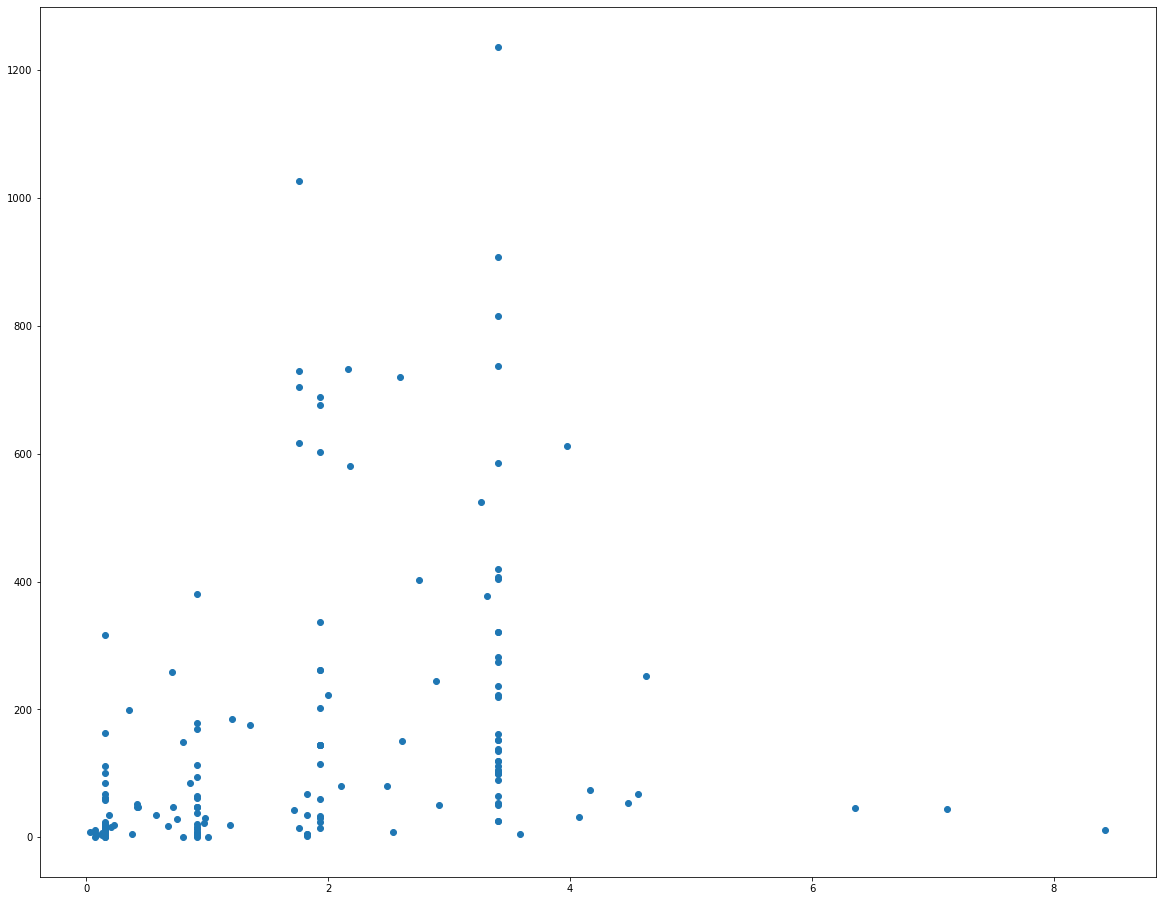

In [85]:
%matplotlib inline
rcParams['figure.figsize'] = 20,16
plt.scatter(covidandwb['DrsPer1k'], covidandwb['TotalDeaths1M'])
plt.show()

In [ ]:
# Recreamos el campo UrbanPopulationPerc

In [41]:
covidandwb['UrbanPopulationPerc'].head()

country
China            59.152
United States    82.256
India            34.030
Brazil           86.569
France           80.444
Name: UrbanPopulationPerc, dtype: float64

In [61]:
def fx(x, y):
    return x*100/y
covidandwb['UrbanPopulationPerc'] = np.vectorize(fx)(covidandwb['UrbanPopulation'], covidandwb['Population'])

In [62]:
covidandwb['UrbanPopulationPerc'].head()

0    57.237132
1    81.032138
2    33.250953
3    85.117876
4    82.471273
Name: UrbanPopulationPerc, dtype: float64

In [ ]:
# Exportamos el Datframe final a CSV

In [68]:
csv_path='/home/dsninja/DataScience/WorkAreas/Anaconda/datasets/covidandwb.csv'
covidandwb.to_csv(csv_path, index=False, header=True)

# EJEMPLO DE ANALISIS SOBRE EL DATASET - KMEANS CLUSTERING

In [35]:
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [83]:
covidkmeans_cols=['TotalDeaths1M', 'TotalTests1M', 'GDPperCap', 'LifeExpect','DrsPer1k', 'NewInfecHIV', 'FertilityRate',
       'UrbanPopulation']
covidkmeans=covidandwb[covidkmeans_cols]
covidkmeans.head()

TotalDeaths1M  TotalTests1M     GDPperCap  LifeExpect  \
country                                                                
China                    3.0      111163.0   9976.676822   76.704000   
United States          709.0      431030.0  62840.020239   78.539024   
India                   88.0       77810.0   2005.863005   69.416000   
Brazil                 749.0      102787.0   9001.234249   75.672000   
France                 560.0      242443.0  41631.090739   82.724390   

               DrsPer1k  NewInfecHIV  FertilityRate  UrbanPopulation  
country                                                               
China            0.9186       1050.0         1.6900      823827650.0  
United States    1.9357      33000.0         1.7295      268720071.0  
India            0.8571       1050.0         2.2220      460295677.0  
Brazil           2.1643       2300.0         1.7300      181335507.0  
France           3.2672        500.0         1.8800       53870058.0

In [84]:
scaler = preprocessing.MinMaxScaler()
features_normal = scaler.fit_transform(covidkmeans)

In [85]:
features_normal

array([[2.36070239e-03, 5.71409009e-02, 5.23015077e-02, ...,
        5.00263296e-03, 9.52710896e-02, 1.00000000e+00],
       [5.73133267e-01, 2.21807410e-01, 3.37191152e-01, ...,
        1.73249078e-01, 1.02113286e-01, 3.26180371e-01],
       [7.10797788e-02, 3.99708831e-02, 9.34542203e-03, ...,
        5.00263296e-03, 1.87424216e-01, 5.58725212e-01],
       ...,
       [1.17161983e-01, 9.90350649e-02, 2.92088828e-01, ...,
        5.00263296e-03, 1.48969340e-01, 5.24397124e-05],
       [3.97762183e-03, 0.00000000e+00, 1.00558641e-02, ...,
        2.63296472e-03, 5.65217391e-01, 1.81605931e-04],
       [3.97762183e-03, 2.82242496e-02, 1.89505462e-02, ...,
        2.63296472e-03, 1.43772735e-01, 4.80200695e-05]])

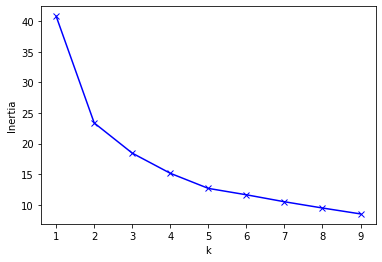

In [86]:
inertia = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(features_normal)
    kmeanModel.fit(features_normal)
    inertia.append(kmeanModel.inertia_)
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

In [87]:
kmeans = KMeans(n_clusters=5).fit(features_normal)

In [88]:
labels = pd.DataFrame(kmeans.labels_) #This is where the label output of the KMeans we just ran lives. Make it a dataframe so we can concatenate back to the original data
covidkmeans=covidkmeans.assign(Country=covidkmeans.index.get_level_values('country'))
covidkmeans.reset_index(drop=True, inplace=True)
labeledcovidkmeans = pd.concat((covidkmeans,labels), axis=1)
labeledcovidkmeans = labeledcovidkmeans.rename({0:'labels'},axis=1)

In [89]:
labeledcovidkmeans

TotalDeaths1M  TotalTests1M      GDPperCap  LifeExpect  DrsPer1k  \
0             3.00      111163.0    9976.676822   76.704000   0.91860   
1           709.00      431030.0   62840.020239   78.539024   1.93570   
2            88.00       77810.0    2005.863005   69.416000   0.85710   
3           749.00      102787.0    9001.234249   75.672000   2.16430   
4           560.00      242443.0   41631.090739   82.724390   3.26720   
5           767.00      356924.0   30337.679133   83.431707   3.40750   
6           679.00       65738.0   11683.949622   76.520000   1.75935   
7           610.00       97766.0    6718.585324   77.109000   2.18480   
8           702.00       18284.0    9673.443674   74.992000   1.93570   
9          1039.00      135551.0    6941.235848   76.516000   1.75935   
10          323.00       80611.0    6374.028196   63.857000   0.15650   
11          634.00      257621.0   34520.085162   83.346341   3.97740   
12          125.00      260905.0   47639.003441   80.892683   3.40750   
13          739.00      222711.0   15924.794239   80.042000   2.59120   
14          268.00       70326.0    5834.166211   70.454000   0.70790   
15           50.00       16354.0    3893.846425   71.509000   0.42690   
16           36.00       14069.0    1698.350394   72.320000   0.58090   
17          974.00      415570.0   47491.323259   81.595122   3.40750   
18           65.00       43196.0    3252.092324   71.095000   0.91860   
19          161.00       72778.0    3096.817402   71.582683   3.40750   
20          120.00      163964.0    9370.176355   77.437000   0.91860   
21          154.00      228661.0   23338.963458   74.998000   2.61170   
22          428.00      194063.0   53048.096210   81.812195   3.40750   
23          141.00      123005.0   15460.644281   77.602439   3.40750   
24           31.00       19837.0    1482.305667   67.114000   0.98010   
25          273.00      498545.0   41719.725442   82.802439   4.62490   
26          358.00      167058.0   12408.596489   75.358537   3.40750   
27          267.00      257667.0   46313.171371   81.948780   1.93570   
28           98.00       89201.0    3222.200634   76.453000   0.15650   
29           31.00       48930.0    1038.651647   70.478000   0.74860   
30          712.00       30540.0    6295.935399   76.800000   1.75935   
31          263.00      222853.0   82818.108162   83.753659   3.40750   
32          742.00       28344.0    3548.590153   71.239000   1.75935   
33          242.00      329992.0   23461.571863   81.324390   3.40750   
34          620.00      152722.0   15592.573679   78.329000   1.93570   
35           83.00      345893.0   68793.784437   80.100000   2.48520   
36          205.00       54025.0    8050.630440   73.892000   1.93570   
37          180.00      212371.0   33994.381917   75.398000   0.91860   
38          587.00      221584.0   54589.060386   82.558537   3.40750   
39          235.00       73164.0   16414.888017   77.633000   2.00310   
40           97.00      175569.0    9812.601405   73.150000   0.91860   
41          268.00       60292.0   12112.134421   80.095000   2.89390   
42          206.00       23859.0    4472.892363   74.063000   0.35490   
43           14.00       21225.0   39159.423563   84.210976   0.91860   
44          120.00      244251.0   51525.046434   81.692683   3.40750   
45          103.00      261445.0    6330.075246   74.175610   3.40750   
46          267.00       22643.0    2505.776752   75.088000   1.93570   
47           13.00       12728.0     771.523814   66.240000   0.07690   
48          438.00      134092.0    4220.490277   74.945000   0.91860   
49          185.00     1012364.0   23991.056677   77.163000   0.91860   
50           92.00      177960.0    8024.803271   78.875000   2.10380   
51          438.00       91819.0    4233.999556   71.808000   3.40750   
52          176.00      108637.0   16150.772761   76.065854   3.40750   
53           75.00      179537.0    4241.788782   74.405000   0

/home/dsninja/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


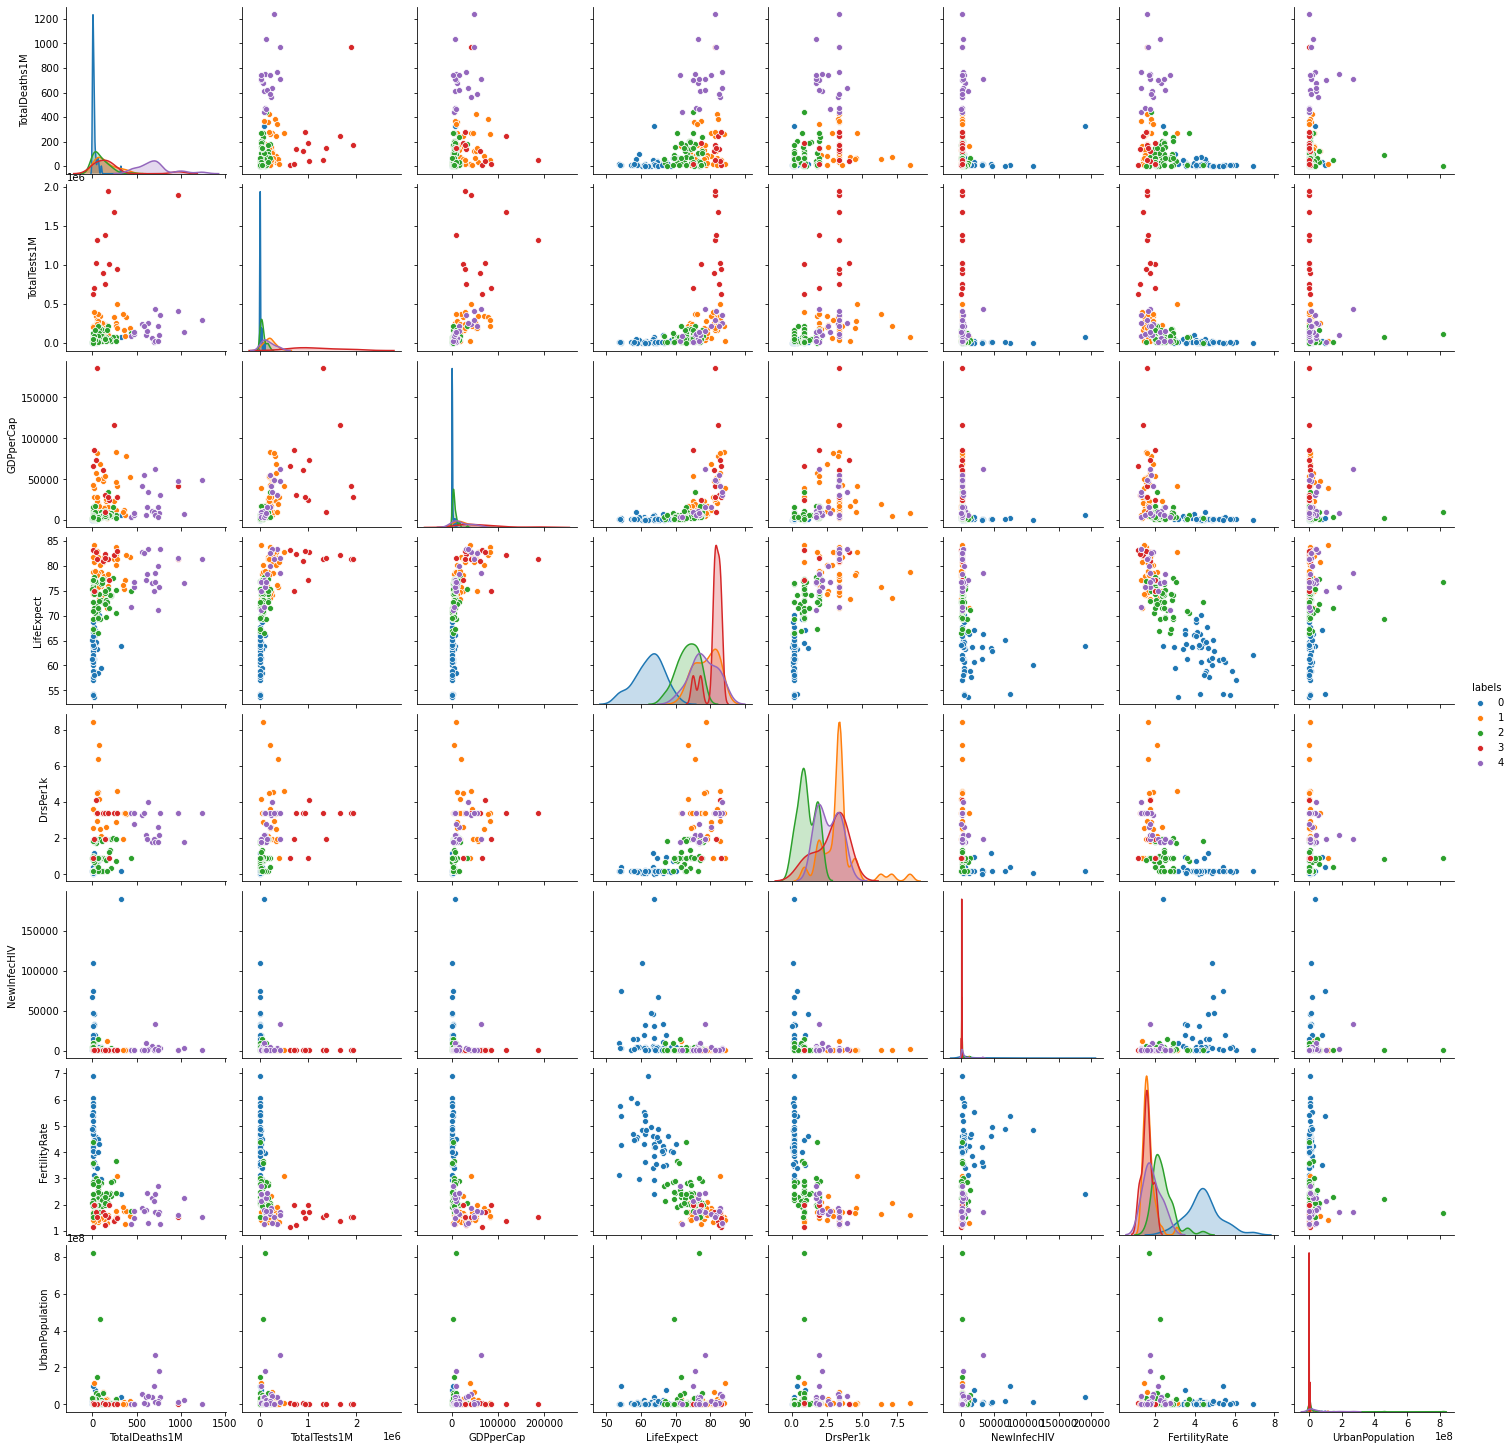

In [91]:
import seaborn as sns
sns.pairplot(labeledcovidkmeans,hue='labels')

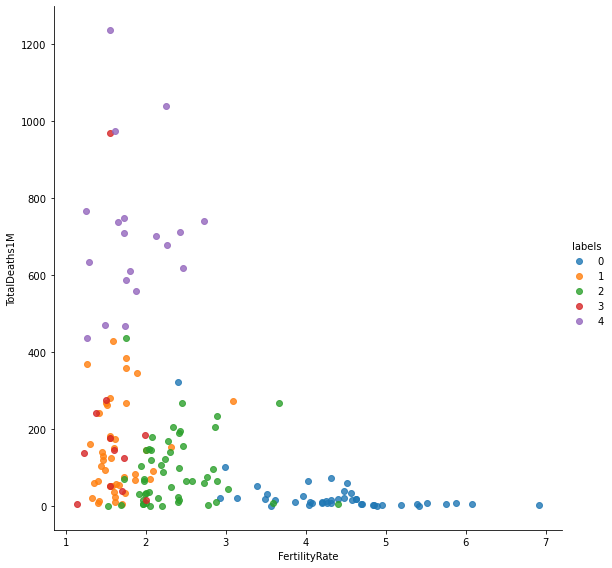

In [92]:
sns.lmplot(x='FertilityRate',y='TotalDeaths1M',data=labeledcovidkmeans,hue='labels',fit_reg=False, height=8)

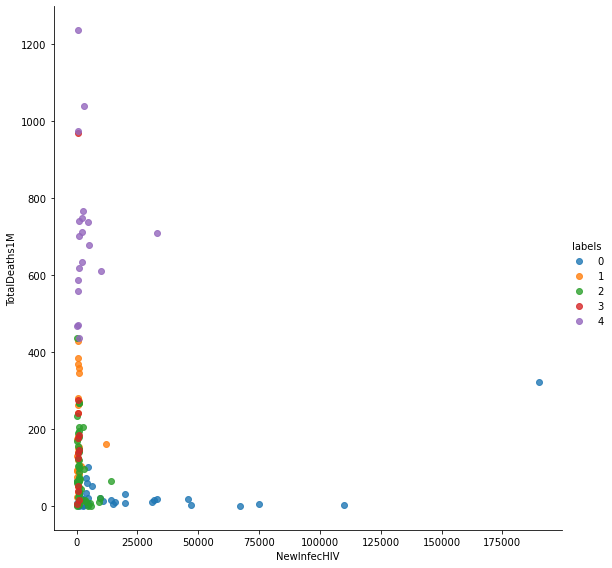

In [93]:
sns.lmplot(x='NewInfecHIV',y='TotalDeaths1M',data=labeledcovidkmeans,hue='labels',fit_reg=False,height=8)

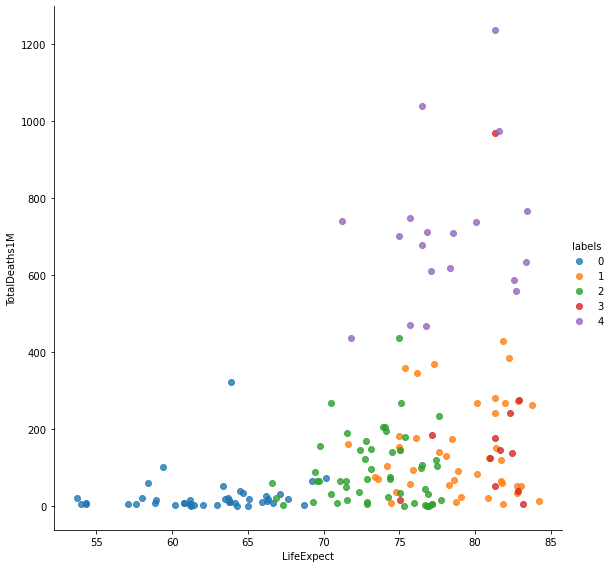

In [94]:
sns.lmplot(x='LifeExpect',y='TotalDeaths1M',data=labeledcovidkmeans,hue='labels',fit_reg=False, height=8)

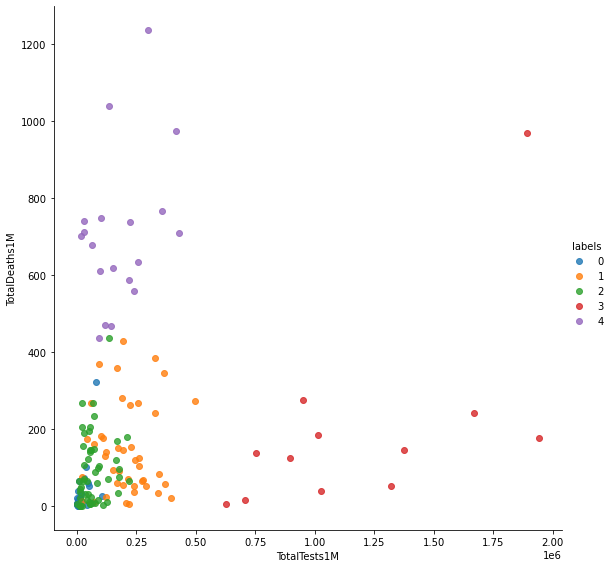

In [95]:
sns.lmplot(x='TotalTests1M',y='TotalDeaths1M',data=labeledcovidkmeans,hue='labels',fit_reg=False, height=8)

In [ ]:
# Esta ultima grafica muestra que los Clusters con mayor numero de tests realizados por 1M de habitantes
# tienen un ratio de muertes por 1M mas bajos. Excepto los puntos verdes que son paises subdesarrollados donde 
# el numero de muertes es bajo cualquiera sea el parametro que veamos....
# Lo mires por donde lo mires los paises subesarrollados tiene MENOS MUERTES!!!...